In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('cleaned_loan_data.csv')

In [4]:
data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,0,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,0,0,0,0,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,1,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,1,0,0


In [56]:
X=data.drop('Default',axis=1)
y=data['Default']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Fit Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_f1 = f1_score(y_test, y_pred_rf)
print(f"Random Forest f1 score: {rf_f1}")


Random Forest f1 score: 0.08708793803721544


In [ ]:
# Fit Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
gb_f1 = f1_score(y_test, y_pred_gb)
print(f"Gradient Boosting f1 score: {gb_f1}")


In [11]:
# Fit XGBoost
xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_f1 = f1_score(y_test, y_pred_xgb)
print(f"XGBoost f1: {xgb_f1}")


XGBoost f1: 0.137427681352915


# MODEL PERFORMANCE UNDER OVERSAMPLING

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from imblearn.over_sampling import RandomOverSampler

def fit_and_evaluate_models_ros(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Perform random over-sampling
    ros = RandomOverSampler(random_state=42)
    X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
    
    # Define models to train
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
        "XGBoost": XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss'),
        "LightGBM": lgb.LGBMClassifier(n_estimators=100, random_state=42),
        "KNN": KNeighborsClassifier(),
        "Naive Bayes": GaussianNB()
    }
    
    # Initialize a DataFrame to store the results
    metrics = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "F1 Score", "Recall"])
    
    # Train each model and evaluate
    for model_name, model in models.items():
        model.fit(X_train_ros, y_train_ros)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        
        metrics = metrics.append({
            "Model": model_name,
            "Accuracy": accuracy,
            "Precision": precision,
            "F1 Score": f1,
            "Recall": recall
        }, ignore_index=True)
    
    return metrics


# Example usage
metrics_df_ros= fit_and_evaluate_models_ros(X, y)
print(metrics_df_ros)


[LightGBM] [Info] Number of positive: 180524, number of negative: 180524
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1303
[LightGBM] [Info] Number of data points in the train set: 361048, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
                 Model  Accuracy  Precision  F1 Score    Recall
0  Logistic Regression  0.665303   0.198286  0.300871  0.623390
1        Decision Tree  0.814666   0.200471  0.201333  0.202203
2        Random Forest  0.884903   0.511482  0.142899  0.083051
3    Gradient Boosting  0.689740   0.224805  0.338938  0.688475
4              XGBoost  0.716076   0.231586  0.338504  0.628814
5             LightGBM  0.699217   0.229144  0.342564  0.678305
6                  KNN  0.664480   0.134444

In [41]:
metrics_df_ros

,Model,Accuracy,Precision,F1 Score,Recall
0,Logistic Regression,0.665303,0.198286,0.300871,0.623390
1,Decision Tree,0.814666,0.200471,0.201333,0.202203
2,Random Forest,0.884903,0.511482,0.142899,0.083051
3,Gradient Boosting,0.689740,0.224805,0.338938,0.688475
4,XGBoost,0.716076,0.231586,0.338504,0.628814
5,LightGBM,0.699217,0.229144,0.342564,0.678305
6,KNN,0.664480,0.134444,0.194292,0.350169
7,Naive Bayes,0.660055,0.209156,0.321915,0.698475


In [42]:
from  imblearn.under_sampling import RandomUnderSampler
def fit_and_evaluate_models_rus(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Perform random over-sampling
    rus = RandomUnderSampler(random_state=42)
    X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
    
    # Define models to train
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
        "XGBoost": XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss'),
        "LightGBM": lgb.LGBMClassifier(n_estimators=100, random_state=42),
        "KNN": KNeighborsClassifier(),
        "Naive Bayes": GaussianNB()
    }
    
    # Initialize a DataFrame to store the results
    metrics = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "F1 Score", "Recall"])
    
    # Train each model and evaluate
    for model_name, model in models.items():
        model.fit(X_train_rus, y_train_rus)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        
        metrics = metrics.append({
            "Model": model_name,
            "Accuracy": accuracy,
            "Precision": precision,
            "F1 Score": f1,
            "Recall": recall
        }, ignore_index=True)
    
    return metrics


# Example usage
metrics_rus_df = fit_and_evaluate_models_rus(X, y)
print(metrics_rus_df)

[LightGBM] [Info] Number of positive: 23753, number of negative: 23753
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000915 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1302
[LightGBM] [Info] Number of data points in the train set: 47506, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
                 Model  Accuracy  Precision  F1 Score    Recall
0  Logistic Regression  0.674094   0.211400  0.321041  0.666949
1        Decision Tree  0.588075   0.154043  0.242647  0.571186
2        Random Forest  0.683552   0.218429  0.330003  0.674576
3    Gradient Boosting  0.684355   0.222011  0.336134  0.691695
4              XGBoost  0.673389   0.211888  0.322172  0.671864
5             LightGBM  0.686156   0.222673  0.336589  0.689153
6                  KNN  0.544958   0.132477  0

In [45]:
metrics_rus_df

,Model,Accuracy,Precision,F1 Score,Recall
0,Logistic Regression,0.674094,0.211400,0.321041,0.666949
1,Decision Tree,0.588075,0.154043,0.242647,0.571186
2,Random Forest,0.683552,0.218429,0.330003,0.674576
3,Gradient Boosting,0.684355,0.222011,0.336134,0.691695
4,XGBoost,0.673389,0.211888,0.322172,0.671864
5,LightGBM,0.686156,0.222673,0.336589,0.689153
6,KNN,0.544958,0.132477,0.211943,0.529661
7,Naive Bayes,0.659174,0.208620,0.321245,0.698136


In [43]:
from  imblearn.over_sampling import SMOTENC 
def fit_and_evaluate_models_smt(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Perform random over-sampling
    smt = SMOTENC(random_state=42,categorical_features=np.arange(9,16,1))
    X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)
    
    # Define models to train
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
        "XGBoost": XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss'),
        "LightGBM": lgb.LGBMClassifier(n_estimators=100, random_state=42),
        "KNN": KNeighborsClassifier(),
        "Naive Bayes": GaussianNB()
    }
    
    # Initialize a DataFrame to store the results
    metrics = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "F1 Score", "Recall"])
    
    # Train each model and evaluate
    for model_name, model in models.items():
        model.fit(X_train_smt, y_train_smt)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        
        metrics = metrics.append({
            "Model": model_name,
            "Accuracy": accuracy,
            "Precision": precision,
            "F1 Score": f1,
            "Recall": recall
        }, ignore_index=True)
    
    return metrics


# Example usage
metrics_smt_df = fit_and_evaluate_models_smt(X, y)
print(metrics_smt_df)

[LightGBM] [Info] Number of positive: 180524, number of negative: 180524
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1520
[LightGBM] [Info] Number of data points in the train set: 361048, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
                 Model  Accuracy  Precision  F1 Score    Recall
0  Logistic Regression  0.677736   0.212191  0.321096  0.659661
1        Decision Tree  0.747758   0.178723  0.231659  0.329153
2        Random Forest  0.832407   0.265148  0.259666  0.254407
3    Gradient Boosting  0.845565   0.297864  0.270735  0.248136
4              XGBoost  0.876248   0.391975  0.194289  0.129153
5             LightGBM  0.859252   0.326695  0.252496  0.205763
6                  KNN  0.626004   0.130955

In [44]:
metrics_smt_df

,Model,Accuracy,Precision,F1 Score,Recall
0,Logistic Regression,0.677736,0.212191,0.321096,0.659661
1,Decision Tree,0.747758,0.178723,0.231659,0.329153
2,Random Forest,0.832407,0.265148,0.259666,0.254407
3,Gradient Boosting,0.845565,0.297864,0.270735,0.248136
4,XGBoost,0.876248,0.391975,0.194289,0.129153
5,LightGBM,0.859252,0.326695,0.252496,0.205763
6,KNN,0.626004,0.130955,0.196939,0.396949
7,Naive Bayes,0.672606,0.208733,0.316826,0.657119


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[LightGBM] [Info] Number of positive: 100853, number of negative: 100853
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1303
[LightGBM] [Info] Number of data points in the train set: 201706, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 100854, number of negative: 100853
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1303
[LightGBM] [Info] Number of data points in the train set: 201707, number of used features: 16


[LightGBM] [Info] Number of positive: 100854, number of negative: 100853
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1303
[LightGBM] [Info] Number of data points in the train set: 201707, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500002 -> initscore=0.000010
[LightGBM] [Info] Start training from score 0.000010
[LightGBM] [Info] Number of positive: 100853, number of negative: 100854
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1303
[LightGBM] [Info] Number of data points in the train set: 201707, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499998 -> initscore=-0

[LightGBM] [Info] Number of positive: 100853, number of negative: 100854
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1303
[LightGBM] [Info] Number of data points in the train set: 201707, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499998 -> initscore=-0.000010
[LightGBM] [Info] Start training from score -0.000010
[LightGBM] [Info] Number of positive: 100853, number of negative: 100853
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1303
[LightGBM] [Info] Number of data points in the train set: 201706, number of used features: 16
[Light

[LightGBM] [Info] Number of positive: 151280, number of negative: 151280
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1303
[LightGBM] [Info] Number of data points in the train set: 302560, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best parameters: {'learning_rate': 0.1, 'min_child_samples': 30, 'n_estimators': 200, 'num_leaves': 50}
[LightGBM] [Info] Number of positive: 151280, number of negative: 151280
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1303
[LightGBM] [Info] Number of data points in the trai

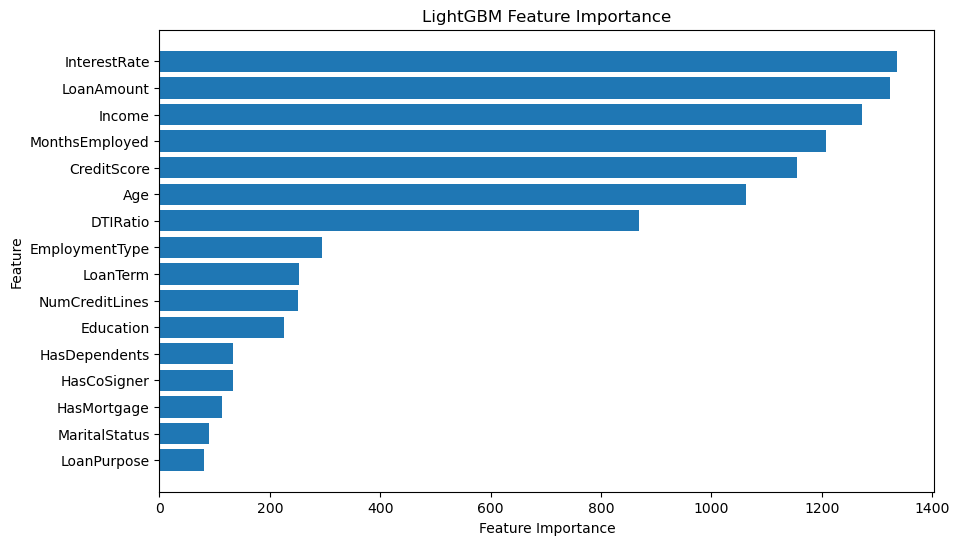

LGBMClassifier(min_child_samples=30, n_estimators=200, num_leaves=50,
               random_state=42)

In [50]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'min_child_samples': [20, 30]
}

lgb_model = lgb.LGBMClassifier(random_state=42)
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, scoring='f1', cv=3, verbose=1)
grid_search.fit(X_train_ros, y_train_ros)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Train the best model
best_lgb_model = grid_search.best_estimator_
best_lgb_model.fit(X_train_ros, y_train_ros)
y_pred = best_lgb_model.predict(X_test)

# Evaluate the best model
best_accuracy = accuracy_score(y_test, y_pred)
best_precision = precision_score(y_test, y_pred)
best_f1 = f1_score(y_test, y_pred)
best_recall = recall_score(y_test, y_pred)

print(f"Best LightGBM Model Accuracy: {best_accuracy}")
print(f"Best LightGBM Model Precision: {best_precision}")
print(f"Best LightGBM Model F1 Score: {best_f1}")
print(f"Best LightGBM Model Recall: {best_recall}")

# Plot feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_lgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('LightGBM Feature Importance')
plt.gca().invert_yaxis()
plt.show()
best_lgb_model

In [61]:
col=['InterestRate','LoanAmount','Income','MonthsEmployed','CreditScore','Age','DTIRatio']
ros = RandomOverSampler(random_state=42)
X_rus, y_rus = ros.fit_resample(X, y)
X_rus=X_rus[col]

In [62]:
lgbm_best_model=lgb.LGBMClassifier(min_child_samples=30,n_estimators=200,num_leaves=50,random_state=42)
lgbm_best_model.fit(X_rus,y_rus)

[LightGBM] [Info] Number of positive: 225694, number of negative: 225694
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024803 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1274
[LightGBM] [Info] Number of data points in the train set: 451388, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(min_child_samples=30, n_estimators=200, num_leaves=50,
               random_state=42)

In [63]:
lgbm_best_model.feature_name_

['InterestRate',
 'LoanAmount',
 'Income',
 'MonthsEmployed',
 'CreditScore',
 'Age',
 'DTIRatio']

In [65]:
import joblib
model_filename = 'lgbm_best_model.pkl'
joblib.dump(lgbm_best_model, model_filename)


['lgbm_best_model.pkl']